In [1]:
import sqlite3
import pandas as pd

In [13]:
ls

LICENSE                database.db            school_data.db
README.md              default.nix            school_data.sql
ai.py                  docker-compose.yml     studybuddy/
create_db.sql          production.yaml        testdata.db
data-generation.ipynb  requirements.txt       update-server.sh


In [14]:
conn = sqlite3.connect("testdata.db")

In [15]:
  # Load data from the database into a Pandas DataFrame
query = "SELECT * FROM StudentPerformance NATURAL JOIN CourseGradeables;"
    

In [16]:
data = pd.read_sql_query(query, conn)
    

In [19]:
data.head()

,StudentID,AssignmentID,TimeItTook,TimeManagementFeedback,Grade,CourseID,AssignmentType,DueDate
0,1000,3037,6,just enough,94,2002,assignment,2024-05-06
1,1000,3018,114,too little,100,2003,test,2024-04-17
2,1000,3059,74,just enough,95,2004,assignment,2024-05-28
3,1000,3041,200,too much,83,2001,presentation,2024-05-10
4,1000,3007,75,too little,69,2002,quiz,2024-04-06


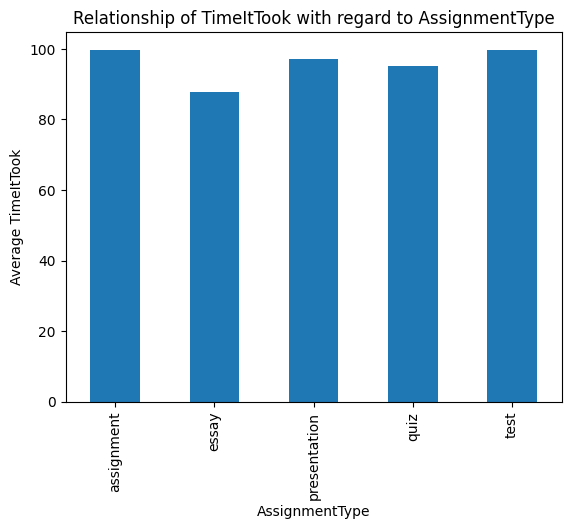

In [22]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and it has columns 'TimeItTook' and 'AssignmentType'
grouped = data.groupby('AssignmentType')['TimeItTook'].mean()

grouped.plot(kind='bar')
plt.ylabel('Average TimeItTook')
plt.title('Relationship of TimeItTook with regard to AssignmentType')
plt.show()

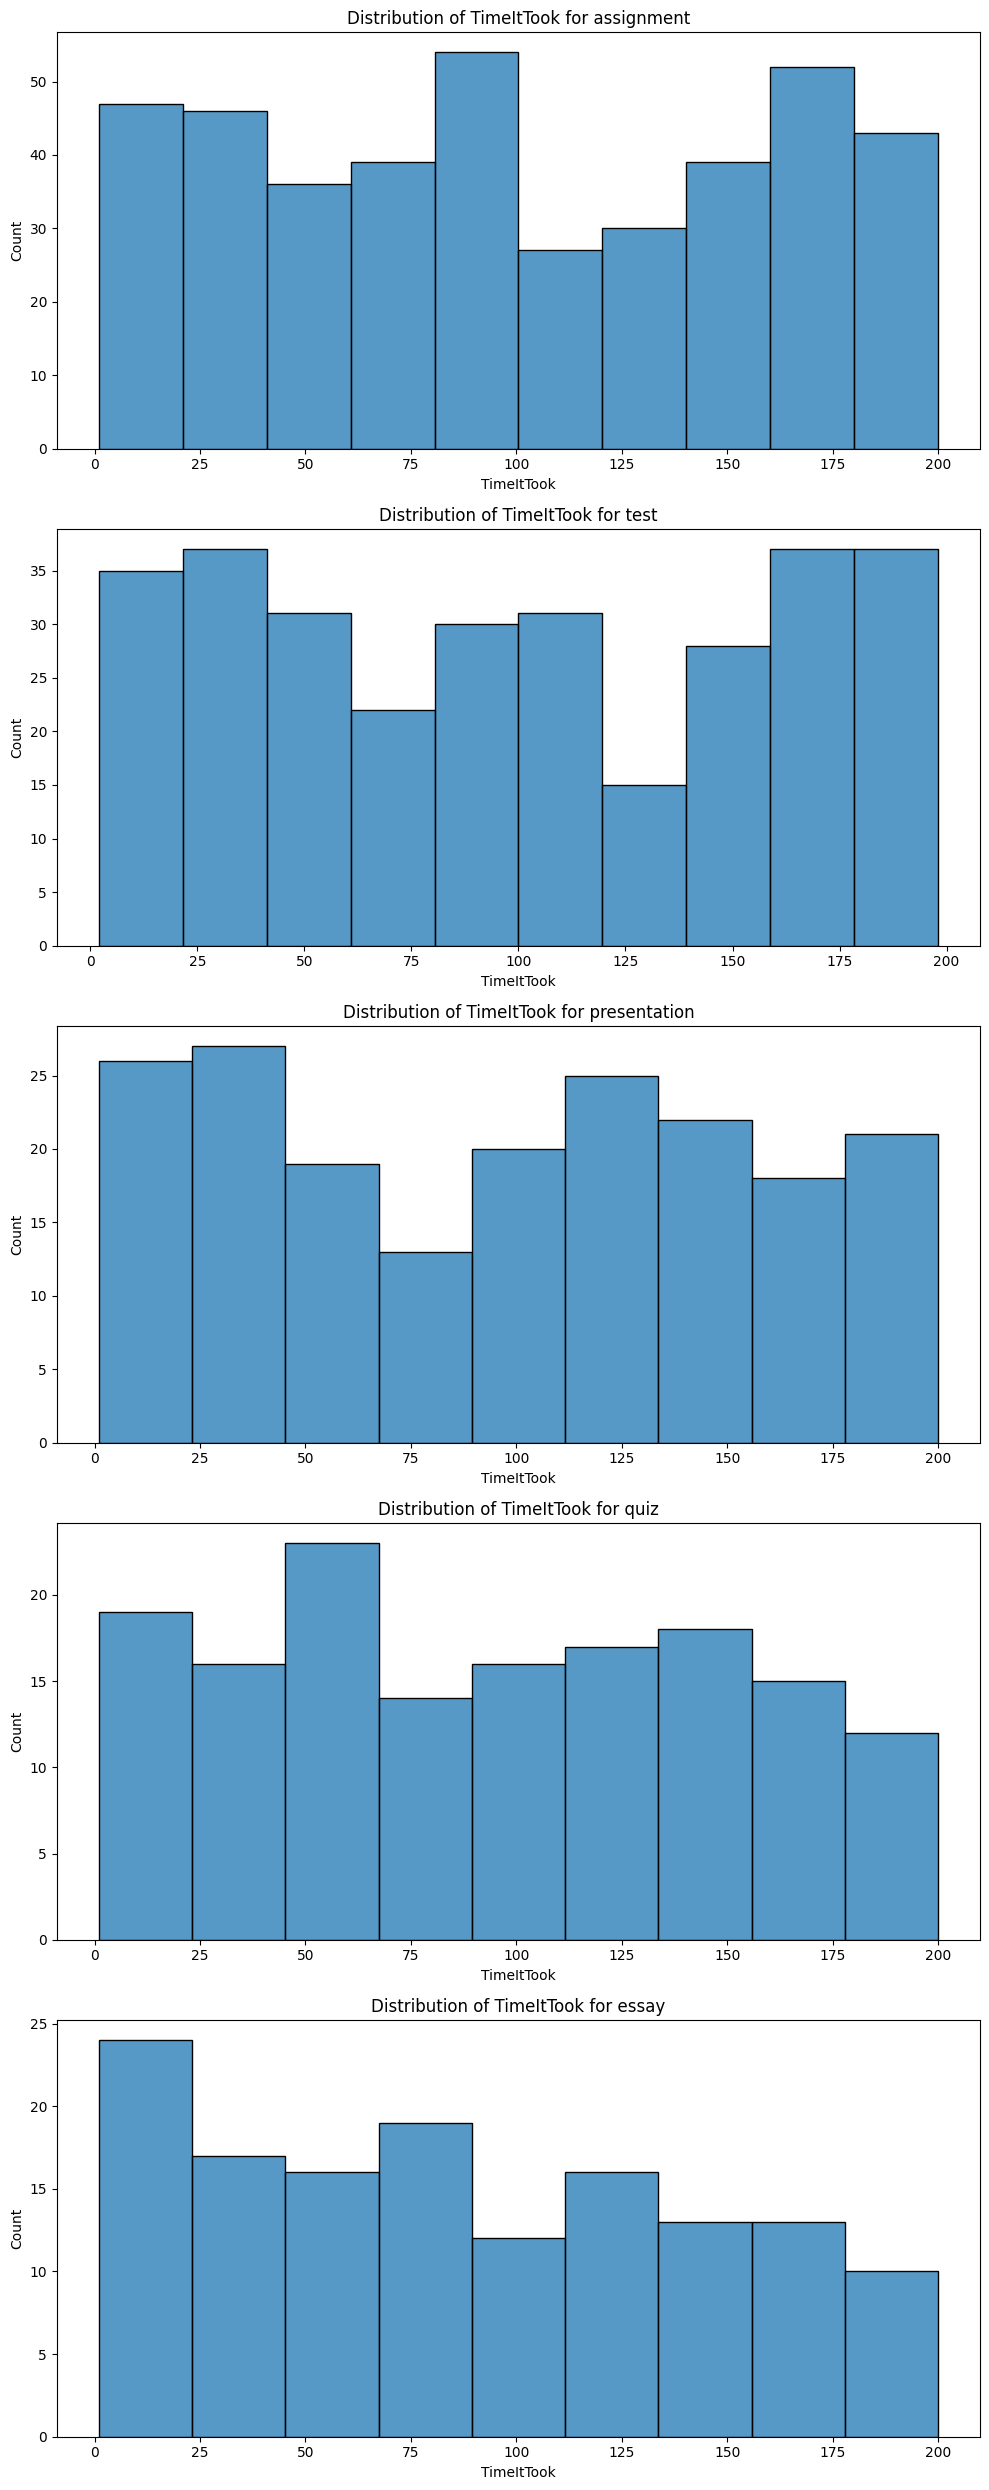

In [23]:
import seaborn as sns

assignment_types = data['AssignmentType'].unique()

fig, axs = plt.subplots(len(assignment_types), figsize=(10, 5*len(assignment_types)))

for i, assignment_type in enumerate(assignment_types):
    specific_data = data[data['AssignmentType'] == assignment_type]['TimeItTook']
    sns.histplot(specific_data, ax=axs[i])
    axs[i].set_title(f'Distribution of TimeItTook for {assignment_type}')

plt.tight_layout()
plt.show()

### generate normal distribution data

In [24]:
import numpy as np
import pandas as pd

# Get unique assignment types
assignment_types = data['AssignmentType'].unique()

# Create an empty DataFrame to store the new data
new_data = pd.DataFrame()

# Generate new data for each assignment type
for assignment_type in assignment_types:
    # Get the mean and standard deviation of TimeItTook for the current assignment type
    mean = data[data['AssignmentType'] == assignment_type]['TimeItTook'].mean()
    std = data[data['AssignmentType'] == assignment_type]['TimeItTook'].std()

    # Generate new TimeItTook values following a normal distribution
    new_time_it_took = np.random.normal(loc=mean, scale=std, size=100)  # Change size as needed

    # Create a DataFrame for the new data
    new_data_type = pd.DataFrame({
        'StudentID': np.random.randint(1000, 2000, size=100),  # Change as needed
        'AssignmentID': np.random.randint(3000, 4000, size=100),  # Change as needed
        'TimeItTook': new_time_it_took,
        'TimeManagementFeedback': np.random.choice(['just enough', 'too little', 'too much'], size=100),
        'Grade': np.random.randint(60, 100, size=100),  # Change as needed
        'CourseID': np.random.randint(2000, 3000, size=100),  # Change as needed
        'AssignmentType': [assignment_type] * 100,
        'DueDate': pd.date_range(start='2024-04-01', periods=100)  # Change as needed
    })

    # Append the new data to the main DataFrame
    new_data = new_data.append(new_data_type, ignore_index=True)



/var/folders/xd/jlr137cn7hd3723czg_2gf_40000gn/T/ipykernel_66062/1486571864.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_data_type, ignore_index=True)


In [25]:
new_data.head()

,StudentID,AssignmentID,TimeItTook,TimeManagementFeedback,Grade,CourseID,AssignmentType,DueDate
0,1645,3628,176.799836,too little,73,2776,assignment,2024-04-01
1,1444,3289,132.285399,just enough,78,2266,assignment,2024-04-02
2,1048,3137,163.394163,too little,77,2558,assignment,2024-04-03
3,1586,3102,99.373057,too little,64,2020,assignment,2024-04-04
4,1887,3025,79.624169,too much,97,2271,assignment,2024-04-05


/var/folders/xd/jlr137cn7hd3723czg_2gf_40000gn/T/ipykernel_66062/2837778546.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  specific_data = new_data[data['AssignmentType'] == assignment_type]['TimeItTook']
/var/folders/xd/jlr137cn7hd3723czg_2gf_40000gn/T/ipykernel_66062/2837778546.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  specific_data = new_data[data['AssignmentType'] == assignment_type]['TimeItTook']
/var/folders/xd/jlr137cn7hd3723czg_2gf_40000gn/T/ipykernel_66062/2837778546.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  specific_data = new_data[data['AssignmentType'] == assignment_type]['TimeItTook']
/var/folders/xd/jlr137cn7hd3723czg_2gf_40000gn/T/ipykernel_66062/2837778546.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  specific_data = new_data[data['AssignmentType'] == assignment_type]['TimeItTook']
/var/folders/xd/jlr137cn7hd3723c

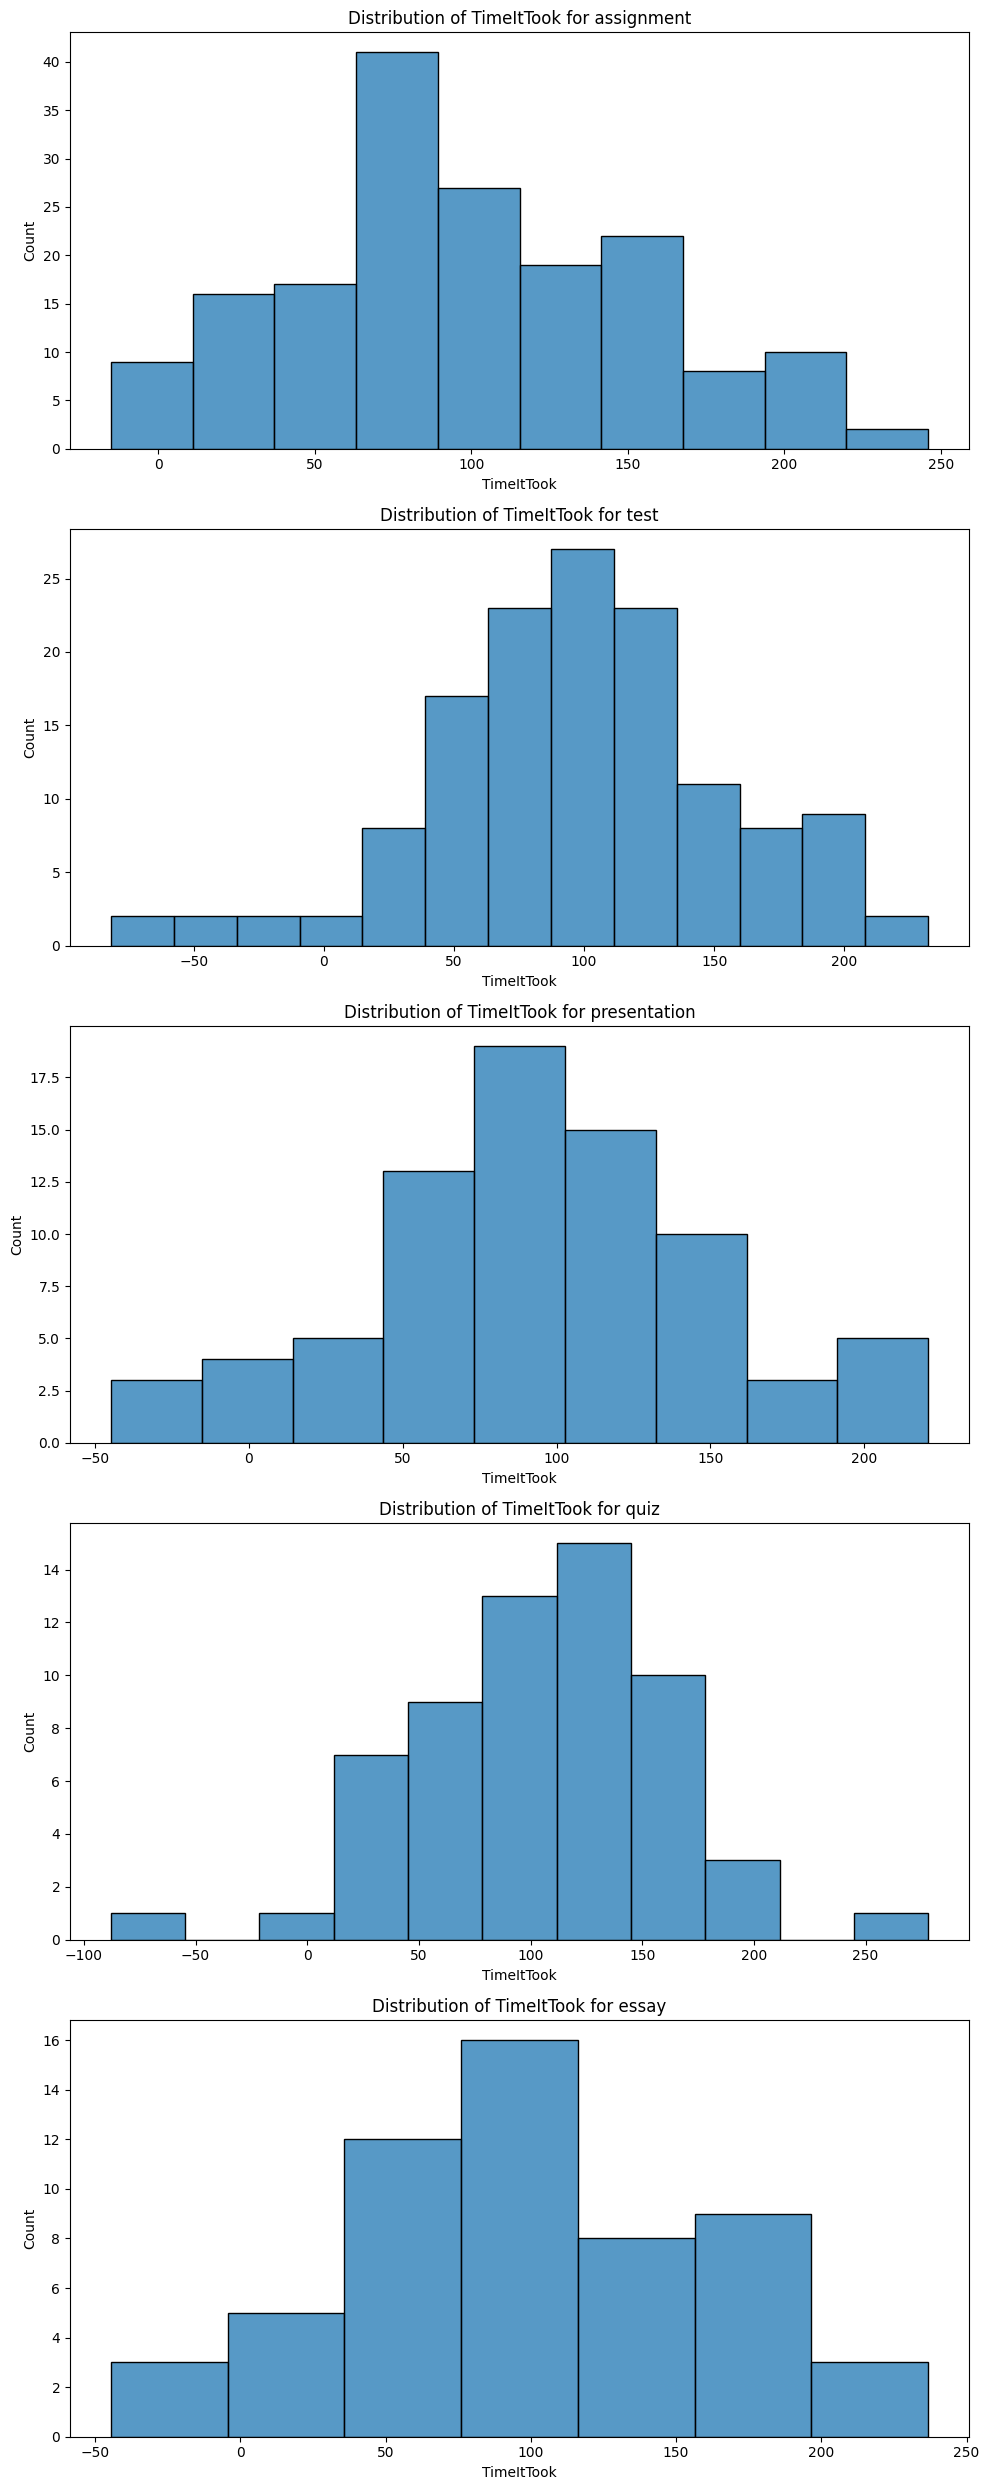

In [27]:
import seaborn as sns

assignment_types = new_data['AssignmentType'].unique()

fig, axs = plt.subplots(len(assignment_types), figsize=(10, 5*len(assignment_types)))

for i, assignment_type in enumerate(assignment_types):
    specific_data = new_data[data['AssignmentType'] == assignment_type]['TimeItTook']
    sns.histplot(specific_data, ax=axs[i])
    axs[i].set_title(f'Distribution of TimeItTook for {assignment_type}')

plt.tight_layout()
plt.show()

In [29]:
import sqlite3

# Create a new SQLite database
conn = sqlite3.connect('database.db')

# Write the DataFrame to a new table in the database
new_data.to_sql('assignments', conn, if_exists='replace', index=False)

# Close the connection
conn.close()